# MCB 32: Lab 07 - Frog Heart Study

---

### Professor Robin Ball 
Using what you learned, you will create a table for the averaged class data. You will also graph the class data, so it is easier to visualize and find major trends. 

*Estimated Time: ~30 Minutes*

---

### Table of Contents
1. [Creating a Bar Graph](#section_1)
2. [Data Analysis](#section_2) <br>
&nbsp;&nbsp;&nbsp; a. [Entering your data](#section_2a)<br>
&nbsp;&nbsp;&nbsp; b. [Calculating class data](#section_2b)<br>
&nbsp;&nbsp;&nbsp; c. [Graphing class data](#section_2c)


In [1]:
!pip install --upgrade oauth2client 
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qgrid_bridge import *
from gspread_import import *

  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)


---

# 1. Creating a Bar Graph <a id="section_1"></a>

You will learn how to create bar graphs to help you vizualize the data. We will draw bar graphs with horizontal bars because it’s easier to label the bars that way. Let's start by creating a random table called groceries.

In [2]:
item_name = ["Apples", "Bananas", "Carrots"]
quantities = [5, 7, 2]
prices = [0.20, 0.25, 0.75]
weights = [0.33, 0.25, 0.16]

In [3]:
groceries = Table().with_columns(
            "Item Name", item_name, 
            "Quantity", quantities, 
            "Price", prices,
            "Weight", weights)
groceries

Item Name,Quantity,Price,Weight
Apples,5,0.2,0.33
Bananas,7,0.25,0.25
Carrots,2,0.75,0.16


In this section, we will draw a graph of the distribution of quantities in the column `Quantity` and weights in `Weight` from the `groceries` table.
 - `select` is a handy method that creates a table with only the desired columns.
 
We don't want the column `Price`, so we only select `Item Name`, `Quantity`, and `Weight`.

In [4]:
groceries.select("Item Name", "Quantity", "Weight")

Item Name,Quantity,Weight
Apples,5,0.33
Bananas,7,0.25
Carrots,2,0.16


To create the bar graph, we will use `barh`.

 - `barh` generates a bar graph of the values in a column. The argument is the column label of the categories. You can create a bar graph using `Table.barh(COLUMN_LABEL)`.
 
Let's plot the new `groceries` table, using `Item Name` as the column label. The item names will appear on the vertical axis and the quantity and weight will be graphed for each item.

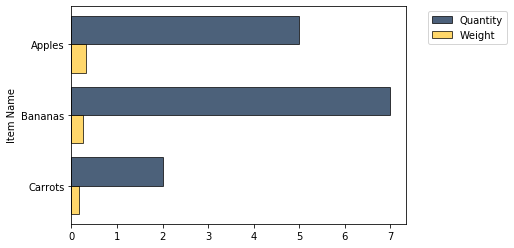

In [5]:
groceries.select("Item Name", "Quantity", "Weight").barh("Item Name")

# 2. Data Analysis <a id="section_2"></a>


### Calculating class data <a id="section_2b"></a>

In order to make the class data available to you, we will pull it in from Google Sheets using `gspread`. To complete this process, we have pasted in the share link for the spreadsheet into the string `url` below and the sheet name in the string `sheet_name` (last year this was lab 6, so that's why the sheet name is called "Lab6_data". Note that the heart rate numbers are the change in heart rate from baseline. Just run the cell to get the data.

In [6]:
#Run this cell
url = "https://docs.google.com/spreadsheets/d/1A8aC4RsDnHBQjCrImudGgdVni0vX08Ve3uaIB01zw28/edit?usp=sharing"
sheet_name = "Lab6_data"

class_data = get_spreadsheet(url, sheet_name)
class_data["HR"] = [float(i) for i in class_data["HR"]]
class_data

OSError: No Google client config found.
Please download json from https://console.developers.google.com/apis/credentials and save as /home/jovyan/.config/gspread_pandas/google_secret.json

Now that we have all of the class data, we would like to group the heart rates and get some summary statistics on these groups. To group data, we use the `Table.group()` method which takes two arguments: the name of a column and an _aggregator function_ to which an array of all of the values in a group will be passed.

This means that if we wanted the mean HR of the groups in the `Condition` column, we would make a call like the one below:

In [ ]:
averages = class_data.group("Condition", np.mean).select("Condition", "HR mean")

# maintaining the order of the Condition variable
conditions = ["Warm temperature", "Cold temperature", "Epinephrine", "Acetylcholine", "KCl", "CaCl2"]
averages = Table.from_df(averages.to_df().set_index("Condition").reindex(conditions).reset_index())
averages

You should now have a table where each cell represents the mean of the change in heart rate for the specified condition.

<div class="alert alert-info">

**QUESTION:** Create another table, `sdevs`, with the standard deviations for each `Condition` group by filling in the function call below.

</div>

_Hint:_ The function `np.std` returns the standard deviation of an array of values. Follow the same pattern as you did for `np.mean` above and select the columns "Condition" and "HR std".

In [ ]:
sdevs = class_data.group(...)

# DO NOT EDIT ANY CODE BELOW THIS COMMENT
# maintaining the order of the Condition variable
conditions = ["Warm temperature", "Cold temperature", "Epinephrine", "Acetylcholine", "KCl", "CaCl2"]
sdevs = Table.from_df(sdevs.to_df().set_index("Condition").reindex(conditions).reset_index())
sdevs

Finally, we want to concatenate these tables into a single table which will have a single `Condition` column, a column each for the HR mean and standard deviation. This is accomplished using `Table.join()`:

In [ ]:
class_data = averages.join("Condition", sdevs)

# DO NOT EDIT ANY CODE BELOW THIS COMMENT
# maintaining the order of the Condition variable
conditions = ["Warm temperature", "Cold temperature", "Epinephrine", "Acetylcholine", "KCl", "CaCl2"]
class_data = Table.from_df(class_data.to_df().set_index("Condition").reindex(conditions).reset_index())
class_data

### 2c. Graphing class data <a id="section_2c"></a>

Before we have you graph the class data, let's consider how to add error bars to a bar graph. Consider the bar plot below using our `groceries` table from earlier. Note here that instead of selecting out the columns we want, we use `Table.drop()` to drop the tables that we _don't_ want.

In [ ]:
groceries.drop("Quantity", "Weight").barh("Item Name")

Let's say we want to (quite arbitrarily) include error bars to $\pm$ 20% of the values shown in the bar graph. We would start by adding these errors to the table:

In [ ]:
groceries = groceries.with_column(
    "Price Error", [.2 * i for i in groceries.column("Price")]
)
groceries

To generate a plot with error bars, we just need to pass the `xerr` argument to `Table.barh()`.

In [ ]:
groceries.drop("Quantity", "Weight", "Price Error").barh("Item Name", 
                                                         xerr=np.flip(groceries.column("Price Error")))

The essential part of the code is adding the `xerr` parameter to the `Table.barh()` call. Note that we passed the _array_ of values to `xerr`, **not** the column name. Note also that we had to reverse the array (using `np.flip`) because of the difference in how `matplotlib` and `datascience` interpret axes.

#### Graph: Change in Heart Rate and Standard Deviation Error (from Class Data)

<div class="alert alert-block alert-info">
    
**QUESTION:** Use the class_data table we just created to make a bar graph of the average data for heart rate. _Include error bars using the standard deviation as the error._ To make your graph easier to read, include a vertical line at $x=0$ by adding `plt.axvline(x=0, color="k")` to your solution.

</div>

_Hint:_ You already have the error information in the `class_data` table since we put the standard deviations in earlier.

In [ ]:
...

---
### Saving the Notebook as a PDF

Congrats on finishing your first lab notebook! To turn in this lab assignment follow the steps below:

>1. Press `Control + P` (or `Command + P` on Mac) to open the Print preview
2. Change the destination so that it saves locally on your own computer.
3. Save as PDF
4. If you are stuck, follow further instructions [here](https://www.wikihow.com/Save-a-Web-Page-as-a-PDF-in-Google-Chrome).

<div class="alert alert-warning">

You must also submit your tables with your lab report. To do this, take a screenshot of this notebook or of the PDF you just made, crop it to your table, and add this to your report.

</div>

Your lab instructor will explain to you what to do afterwards.
---
#### References

- UC Berkeley Foundations of Data Science (Data 8) Textbook: https://www.inferentialthinking.com/chapters/intro

---

Notebook developed by: Samantha Yuan and Chris Pyles

Data Science Modules: http://data.berkeley.edu/education/modules
